In [1]:
using PyPlot

INFO: Recompiling stale cache file /Users/stevenj/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


# Review: Solving ODEs via eigenvectors

If we have a simple scalar ODE:

$$
\frac{dx}{dt} = a x
$$

then the solution is

$$
x(t) = e^{at} x(0)
$$

where $x(0)$ is the initial condition.

If we have an $m\times m$ system of ODEs

$$
\frac{d\vec{x}}{dt} = A\vec{x}
$$

we know that if $A = X \Lambda X^{-1}$ is diagonalizable with eigensolutions $A\vec{x}_k = \lambda_k \vec{x}_k$ ($k=1,2,\ldots,m$), then we can write the solution as:

$$
\vec{x}(t) = c_1 e^{\lambda_1 t} \vec{x}_1 + c_2 e^{\lambda_2 t} \vec{x}_2 + \cdots
$$

where the $\vec{c}$ coefficients are determined from the initial conditions

$$
\vec{x}(0) = c_1 \vec{x}_1 + c_2 \vec{x}_2 + \cdots
$$

i.e. $\vec{c} = X^{-1} \vec{x}(0)$ where $X$ is the matrix whose columns are the eigenvectors and $\vec{c} = (c_1, c_2, \ldots, c_m)$.

## Matrix exponential, first guess:

It sure would be nice to have a formula as simple as $e^{at} x(0)$ from the scalar case.  Can we **define the exponential of a matrix** so that 

$$
\vec{x}(t) = \underbrace{e^{At}}_\mbox{???} \vec{x}(0) \, ?
$$

But what is the exponential of a matrix?  

We can guess at least one case.  For **eigenvectors, the matrix A acts like a scalar λ**, so we should have $e^{At} \vec{x}_k = e^{\lambda_k t} \vec{x}_k$! 

This turns out to be exactly correct, but let's take it a bit more slowly.

# Writing ODE solution in matrix form

Another way of saying this is that we'd like to write the solution $x(t)$ as $\mbox{(some matrix)} \times \vec{x}(0)$.  This will help us to understand the solution as a *linear operation on the initial condition* and manipulate it algebraically, in much the same way as writing the solution to $Ax=b$ as $x = A^{-1} b$ helps us work with matrix equations (even though we rarely compute matrix inverses explicitly in practice).

To do so, let's break down

$$
\vec{x}(t) = c_1 e^{\lambda_1 t} \vec{x}_1 + c_2 e^{\lambda_2 t} \vec{x}_2 + \cdots
$$

into steps.

1. Compute $\vec{c} = X^{-1} \vec{x}(0)$.  That is, write the initial condition in the basis of eigenvectors.  (In practice, we would solve $X \vec{c} = \vec{x}(0)$ by elimination, rather than computing $X^{-1}$ explicitly!)

2. Multiply each component of $\vec{c}$ by $e^{\lambda t}$.

3. Multiply by $X$: i.e. multiply each coefficient $c_k e^{\lambda_k t}$ by $\vec{x}_k$ and add them up.

In matrix form, this becomes:

$$
\vec{x}(t) = X \underbrace{\begin{pmatrix} e^{\lambda_1 t} & & & \\
                                               & e^{\lambda_2 t} & & \\
                                               & & \ddots & \\
                                               & & & e^{\lambda_m t} \end{pmatrix}}_{e^{\Lambda t}} \underbrace{X^{-1} \vec{x}(0)}_\vec{c}
= \boxed{ e^{At} \vec{x}(0) }
$$

where we have *defined* the "matrix exponential" of a diagonalizable matrix as:

$$
e^{At} = X e^{\Lambda t} X^{-1}
$$

Note that we have defined the exponential $e^{\Lambda t}$ of a *diagonal matrix* $\Lambda$ to be the diagonal matrix of the $e^{\lambda t}$ values.

* Equivalently, $e^{At}$ is the matrix with the **same eigenvectors as A but with eigenvalues λ replaced by** $e^{\lambda t}$.

* Equivalently, **for eigenvectors, A acts like a number λ**, so $e^{At} \vec{x}_k = e^{\lambda_k t} \vec{x}_k$.

## Example

For example, the matrix

$$
A = \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
$$

has two eigenvalues $\lambda_1 = +1$ and $\lambda_2 = -1$ (corresponding to exponentially *growing* and *decaying* solutions to $d\vec{x}/dt = A\vec{x}$, respectively).  The corresponding eigenvectors are:

$$
\vec{x}_1 = \begin{pmatrix} 1 \\ 1 \end{pmatrix} , \; \vec{x}_2 = \begin{pmatrix} 1 \\ -1 \end{pmatrix} .
$$

Hence, the matrix exponential should be:

$$
e^{At} = \underbrace{\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}}_X
         \underbrace{\begin{pmatrix} e^t &  \\  & e^{-t} \end{pmatrix}}_{e^{\Lambda t}}
         \underbrace{\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}^{-1}}_{X^{-1}}
       = \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
         \begin{pmatrix} e^t &  \\  & e^{-t} \end{pmatrix}
         \left[ \frac{1}{2} \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix} \right]
       = \frac{1}{2} 
           \begin{pmatrix} e^t & e^{-t}  \\ e^t & -e^{-t} \end{pmatrix}
          \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
       = \frac{1}{2} 
         \begin{pmatrix} e^t + e^{-t} & e^t - e^{-t} \\ e^t - e^{-t} & e^t + e^{-t}\end{pmatrix}
       = \begin{pmatrix} \cosh(t) & \sinh(t) \\ \sinh(t) & \cosh(t) \end{pmatrix}
$$

In this example, $e^{At}$ turns out to have a very nice form!  In general, no one ever, ever, calculates matrix exponentials analytically like this except for toy $2\times 2$ problems or *very* special matrices.  (I will never ask you to go through this tedious algebra on an exam.)

The computer is pretty good at computing matrix exponentials, however, and in Julia this is calculated by the `expm(A*t)` function.  (There is a famous paper: [19 dubious ways to compute the exponential of a matrix](http://www.cs.cornell.edu/cv/researchpdf/19ways+.pdf) on techniques for this tricky problem.)  Let's try it:

In [2]:
t = 1
[cosh(t) sinh(t)
 sinh(t) cosh(t)]

2×2 Array{Float64,2}:
 1.54308  1.1752 
 1.1752   1.54308

In [3]:
expm([0 1; 1 0]*t)

2×2 Array{Float64,2}:
 1.54308  1.1752 
 1.1752   1.54308

Yup, it matches for $t=1$.

What happens for larger $t$, say $t=20$?

In [4]:
t = 20
[cosh(t) sinh(t); sinh(t) cosh(t)]

2×2 Array{Float64,2}:
 2.42583e8  2.42583e8
 2.42583e8  2.42583e8

In [5]:
expm([0 1; 1 0]*20)

2×2 Array{Float64,2}:
 2.42583e8  2.42583e8
 2.42583e8  2.42583e8

For large $t$, the $e^t$ exponentially growing term takes over, and $\cosh(t) \approx \sinh(t) \approx e^t/2$:

$$
e^{At} = \begin{pmatrix} \cosh(t) & \sinh(t) \\ \sinh(t) & \cosh(t) \end{pmatrix}
\approx \frac{e^t}{2} \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}
$$

In [6]:
exp(20)/2 * [1 1; 1 1]

2×2 Array{Float64,2}:
 2.42583e8  2.42583e8
 2.42583e8  2.42583e8

But we could have seen this from our eigenvector expansion too:

$$
\vec{x}(t) = c_1 e^t \begin{pmatrix} 1 \\ 1 \end{pmatrix} + c_2 e^{-t} \begin{pmatrix} 1 \\ -1 \end{pmatrix} \approx c_1 e^t \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

where $c_1$ is the coefficient of the initial condition: (nearly) every initial condition should give $\vec{x}(t)$ proportional to $(1,1)$ for large $t$, except in the very special case where $c_1 = 0$.

In fact, since **these** two eigenvectors are an **orthogonal basis** (not by chance: we will see later that it happens because $A^T = A$), we can get $c_1$ just by a dot product:

$$
c_1 = \frac{\vec{x}_1 ^T \vec{x}(0)}{\vec{x}_1 ^T \vec{x}_1} = \frac{\vec{x}_1 ^T \vec{x}(0)}{2}
$$

and hence

$$
\vec{x}(t) \approx c_1 e^t \vec{x}_1 = \frac{e^t}{2} \vec{x}_1 \vec{x}_1^T  \vec{x}(0) = \frac{e^t}{2} \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \vec{x}(0) 
$$

which is the same as our approximation for $e^{At}$ above.

# Series definition of a matrix exponential

Just plugging in $t=1$ above, we see that we have defined the [matrix exponential](https://en.wikipedia.org/wiki/Matrix_exponential) by

$$
e^{A} = X e^{\Lambda} X^{-1}
$$

This works (for a diagonalizable matrix $A$, at least), but it is a bit odd.  It doesn't *look* much like any definition of $e^x$ for scalar $x$, and it's not clear how you would extend it to non-diagonalizable (defective) matrices.

Instead, we can **equivalently** define matrix exponentials by starting with the **Taylor series** of $e^x$:

$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!} + \cdots
$$

It is quite natural to define $e^A$ (for **any square** matrix $A$) by the **same series**:

$$
e^A = I + A + \frac{A^2}{2!} + \frac{A^3}{3!} + \cdots + \frac{A^n}{n!} + \cdots
$$

This involves only familiar matrix multiplication and addition, so it is completely unambiguous, and it converges because the $n!$ denominator grows faster than $A^n \sim \lambda^n$ for the biggest $|\lambda|$.

Let's try summing up 100 terms of this series for a random $A$ and comparing it to both Julia's `expm` and to our formula in terms of eigenvectors:

In [7]:
A = randn(5,5)

5×5 Array{Float64,2}:
 -1.26187   -1.21532    -0.289335    0.442679   -0.613834
  0.875454   0.517032    0.454975    1.64183     0.337647
  0.272534  -0.630283   -0.990167   -0.0429488   0.194119
  0.669969   0.0697198   1.04551    -0.526894    0.40237 
  1.25939    1.13556    -0.0282471   0.360049   -1.78388 

In [8]:
expm(A)

5×5 Array{Float64,2}:
 -0.236041  -0.797081  -0.349314  -0.592086  -0.217202 
  1.08355    0.87197    0.827617   1.58321    0.210652 
 -0.16096   -0.486134   0.166086  -0.403086  -0.0402816
  0.297634  -0.383914   0.394537   0.500359   0.058805 
  0.528957   0.178879   0.200282   0.530341   0.1606   

In [9]:
series = I + A # first two terms
term = A
for n = 2:100
    term = term*A / n # compute Aⁿ / n! from the previous term Aⁿ⁻¹/(n-1)!
    series = series + term
end
series

5×5 Array{Float64,2}:
 -0.236041  -0.797081  -0.349314  -0.592086  -0.217202 
  1.08355    0.87197    0.827617   1.58321    0.210652 
 -0.16096   -0.486134   0.166086  -0.403086  -0.0402816
  0.297634  -0.383914   0.394537   0.500359   0.058805 
  0.528957   0.178879   0.200282   0.530341   0.1606   

In [10]:
λ, X = eig(A)
X * diagm(exp.(λ)) * inv(X)

5×5 Array{Complex{Float64},2}:
 -0.236041-6.1758e-17im   …   -0.217202+3.56352e-17im
   1.08355+1.25766e-16im       0.210652-4.58081e-17im
  -0.16096-2.11666e-17im     -0.0402816+1.7628e-17im 
  0.297634+4.10749e-17im       0.058805+4.28109e-18im
  0.528957+8.18838e-17im         0.1606-2.94471e-17im

Hurray, they all match, up to roundoff errors!  (Though the eigenvector method doesn't realize that the result is real, and we see tiny imaginary parts due to roundoff errors.)

But why does the eigenvector definition match the series definition?  They look quite different, but they are not!  We can see this simply by looking at what the series does to an eigenvector:

## Series definition for eigenvectors

Even simpler, the key fact is that the eigenvalues of $e^A$ are $e^\lambda$.  We can see this from the series definition:

If $Ax = \lambda x$, thend
$$
e^A x = \left(I + A + \frac{A^2}{2!} + \cdots\right)x = \left(1 + \lambda + \frac{\lambda^2}{2!} + \cdots\right) x = e^\lambda x
$$
from the series definition of $e^\lambda$.

It follows that $e^A$ has the same eigenvectors as $A$ and the eigenvalues become $e^\lambda$.

If $A$ is diagonalizable, this means $e^A = X e^\Lambda X^{-1}$: we get the same result as before!

# Matrix exponentials and derivatives

In first-year calculus, we learn that $\frac{d}{dt} e^{at} = a e^{at}$.  The same thing works for matrices!

$$
\boxed{\frac{d}{dt} e^{At} = A e^{At}}
$$

You can derive this in various ways.  For example, you can plug $e^{At}$ into the series definition and take the derivative term-by-term.

This is why $\vec{x}(t) = e^{At} \vec{x}(0)$ solves our ODE:

1. It satisfies $d\vec{x}/dt = A\vec{x}$, since $\frac{d}{dt} e^{At} \vec{x}(0) = A e^{At} \vec{x}(0)$

2. It satisfies the initial condition: $e^{A\times0} \vec{x}(0) = \vec{x}(0)$, since from the series definition we can see that $e^{A\times0}=I$.



# Products of matrix exponentials

In high school, you learn that $e^x e^y = e^{x+y}$.  (In fact, exponentials $a^x$ are essentially the *only* functions that have this property.)

However, this is **not** in general true for matrices:

$$
\boxed{e^A e^B \ne e^{A + B} }
$$

unless $AB = BA$ (unless they **commute**).

This can be seen from the series definition: if you multiply together the series for $e^A$ and $e^B$, you can only re-arrange this into the series for $e^{A + B}$ if you are allowed to re-order products of $A$ and $B$.  For example, the $(A+B)^2=(A+B)(A+B)$ term gives $A^2 +AB+BA +B^2$ (not $A^2 +2AB +B^2$!), which requires both orders $BA$ and $AB$.

Let's try it:

In [11]:
B = randn(5,5)
expm(A) * expm(B)

5×5 Array{Float64,2}:
  0.135815   -0.339749     0.371641   0.278371   -0.131038
 -0.0985706   0.711324    -1.47247   -0.502543    0.31453 
  0.724205   -0.32469      1.51876   -0.0656207  -0.424226
  0.163229   -0.00288664   0.297797   0.196358   -0.144129
 -0.248556    0.216481    -0.963454   0.0133861   0.228723

In [12]:
expm(A + B)

5×5 Array{Float64,2}:
 -0.0482809   0.10172   -0.616931  -0.0988577   0.0570644
  0.0756028   1.19615   -0.872191  -0.0366706   0.19077  
  0.336247   -1.49738    1.46186   -0.286326   -0.409553 
 -0.0590962   0.53724   -0.249192   0.333769    0.118865 
 -0.114166    0.251426  -0.142315   0.260919    0.10884  

They are not even close!

However, since $A$ and $2A$ commute ($A\times2A=2A^2 = 2A \times A$), we *do* have $e^{A}e^{2A}=e^{3A}$:

In [13]:
expm(A) * expm(2A)

5×5 Array{Float64,2}:
 -0.273703   1.64908   -0.49427   -0.0383585   0.122381 
 -1.20727   -2.89849   -0.572533  -2.16251    -0.436401 
 -0.356912   0.911645  -0.44195   -0.315451    0.0405576
 -1.17514   -0.226137  -0.963212  -1.61456    -0.171502 
 -0.630696  -0.90463   -0.414339  -1.00801    -0.174048 

In [14]:
expm(3A)

5×5 Array{Float64,2}:
 -0.273703   1.64908   -0.49427   -0.0383585   0.122381 
 -1.20727   -2.89849   -0.572533  -2.16251    -0.436401 
 -0.356912   0.911645  -0.44195   -0.315451    0.0405576
 -1.17514   -0.226137  -0.963212  -1.61456    -0.171502 
 -0.630696  -0.90463   -0.414339  -1.00801    -0.174048 

In [15]:
expm(2A) * expm(A)

5×5 Array{Float64,2}:
 -0.273703   1.64908   -0.49427   -0.0383585   0.122381 
 -1.20727   -2.89849   -0.572533  -2.16251    -0.436401 
 -0.356912   0.911645  -0.44195   -0.315451    0.0405576
 -1.17514   -0.226137  -0.963212  -1.61456    -0.171502 
 -0.630696  -0.90463   -0.414339  -1.00801    -0.174048 

## Inverses of matrix exponentials

As a special case of the above, since $A$ and $-A$ commute, we have $e^A e^{-A} = e^{A-A} = I$, so:

$$
\boxed{\left(e^A\right)^{-1} = e^{-A}}
$$

For example

In [16]:
inv(expm(A))

5×5 Array{Float64,2}:
  1.86221    1.0154     1.52607   -2.3588     2.43312 
 -0.189376   0.650803   0.397544  -1.45859   -0.475964
 -0.553816   0.962249   2.47426   -0.380656  -1.25117 
 -0.329232  -0.398964  -2.53033    2.32538   -1.40807 
 -4.14463   -3.95173   -0.198922   2.18933    4.95307 

In [17]:
expm(-A)

5×5 Array{Float64,2}:
  1.86221    1.0154     1.52607   -2.3588     2.43312 
 -0.189376   0.650803   0.397544  -1.45859   -0.475964
 -0.553816   0.962249   2.47426   -0.380656  -1.25117 
 -0.329232  -0.398964  -2.53033    2.32538   -1.40807 
 -4.14463   -3.95173   -0.198922   2.18933    4.95307 

# Matrix exponentials as propagators

From above, we had $\vec{x}(t) = e^{At} \vec{x}(0)$ solving $d\vec{x}/dt = A\vec{x}$ given the initial condition at $t=0$.

However, there is nothing that special about $t=0$.  We could instead have given $\vec{x}(t)$ and asked for $\vec{x}(t+\Delta t)$ and the result would have been similar:

$$
\boxed{ \vec{x}(t+\Delta t) = e^{A\Delta t} \vec{x(t)} } = e^{A\Delta t} e^{A t} \vec{x}(0) = 
e^{A(t + \Delta t)} \vec{x}(0)\, .
$$

Viewed in this way, the matrix $T = e^{A\Delta t}$ can be thought of as a "propagator" matrix: it takes the solution at any time $t$ and "propagates" it forwards in time by $\Delta t$.

The *inverse* of this propagator matrix is simply $T^{-1} = e^{-A\Delta t}$, which propagates *backwards* in time by $\Delta t$. 

If we multiply by this propagator matrix repeatedly, we can get $\vec{x}$ at a whole sequence of time points:

$$
\vec{x}(0), \vec{x}(\Delta t), \vec{x}(2\Delta t), \ldots =
\vec{x}(0), T \vec{x}(0), T^2 \vec{x}(0), \ldots
$$

which is nice for plotting the solutions as a function of time!  Let's try it for our [two masses and springs example](ODEs.ipynb):

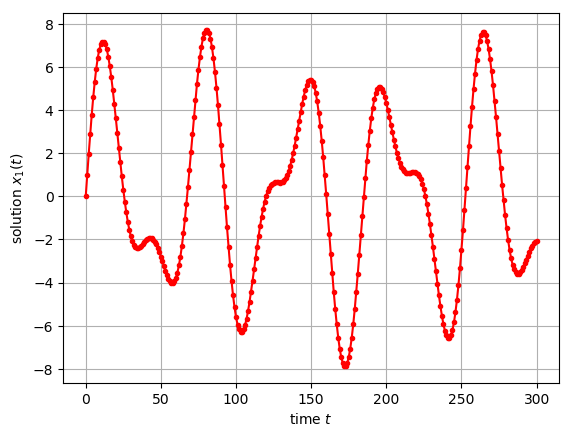

In [18]:
C = [ 0     0    1 0
      0     0    0 1
     -0.02  0.01 0 0
      0.01 -0.02 0 0 ]
Δt = 1.0
T = expm(C*Δt)  # propagator matrix

x₀ = [0.0,0,1,0]  # initial condition

# loop over 300 timesteps and keep track of x₁(t)
x = x₀
x₁ = [ x₀[1] ]
for i = 1:300
    x = T*x     # repeatedly multiply by T
    push!(x₁, x[1])  # & store current x₁(t) in the array x₁
end

plot((0:300)*Δt, x₁, "r.-")
xlabel("time \$t\$")
ylabel("solution \$x_1(t)\$")
grid()

(This is **not** an approximate solution.  It is the *exact* solution, up to the computer's roundoff errors, at the times $t=0,\Delta t, 2\Delta t, \ldots$.  Don't confuse it with approximations like [Euler's method](https://en.wikipedia.org/wiki/Euler_method).)

# Key point: Stability of solutions in eᴬ vs. Aⁿ

It is important to compare and contrast the two cases we have studied:

* Multiplying by $A^n$ (e.g. in **linear recurrence** equations $x_{n+1} = Ax_n$) corresponds to multiplying each eigenvector by $\lambda^n$, which:
  - blows up if $|\lambda| > 1$
  - decays if $|\lambda| < 1$
  - oscillates if $|\lambda|=1$
  - If $\lambda = 1$ you have a steady-state vector (a stable "attractor" if the other eigenvalue have $|\lambda| < 1$).
  - large-$n$ behavior dominated by biggest $|\lambda|$

versus

* Multiplying by $e^{At}$ (e.g. **linear differential** equations $dx/dt=Ax$ ), corresponds to multiplying each eigenvector by $e^{\lambda t}$, which
  - blows up if $\operatorname{Re}(\lambda) > 0$
  - decays if $\operatorname{Re}(\lambda) < 0$
  - oscillates if $\operatorname{Re}(\lambda) = 0$ (purely imaginary λ)
  - If $\lambda = 0$ you have a steady-state solution (a stable "attractor" if the other eigenvalue have $\operatorname{Re}(\lambda) < 0$). 
  - large-$t$ behavior dominated by biggest $\operatorname{Re}(\lambda)$.  (Note: not biggest magnitude!  Remember, $0 > -1 > -2$.)

## Relating eᴬᵗ and Aⁿ

These two cases are **related by the propagator matrix** $T = e^{A\Delta t}$!  Solving the ODE for long time, or multiplying by $e^{At}$ for large $t$, corresponds to **repeatedly multiplying** by $T$!

What are the eigenvalues of $T$ for a diagonalizable $A = X \Lambda X^{-1}$? Well, since 

$$
T = e^{A \Delta t} = X e^{\Lambda \Delta t} X^{-1} = 
\begin{pmatrix} e^{\lambda_1 \Delta t} & & & \\
                                               & e^{\lambda_2 \Delta t} & & \\
                                               & & \ddots & \\
                                               & & & e^{\lambda_m \Delta t} \end{pmatrix} X^{-1}
$$

the eigenvalues of $T$ are just $e^{\lambda \Delta t}$ (the equation above is precisely the diagonalization of $T$).

Equivalently, for an eigenvector $\vec{x}_k$ of $A$, $T\vec{x}_k = e^{\lambda_k \Delta t} \vec{x}_k$, so $\vec{x}_k$ is **also an eigenvector** of $T$ with eigenvalue $e^{\lambda_k \Delta t}$.  Let's check:

In [19]:
eigvals(expm(A*Δt))

5-element Array{Complex{Float64},1}:
 0.492506+1.38122im 
 0.492506-1.38122im 
 0.138173+0.145821im
 0.138173-0.145821im
 0.201619+0.0im     

In [20]:
λ = eigvals(A)
exp.(λ * Δt)

5-element Array{Complex{Float64},1}:
 0.492506+1.38122im 
 0.492506-1.38122im 
 0.138173+0.145821im
 0.138173-0.145821im
 0.201619+0.0im     

Yup, they match (although the order is different: Julia gives the eigenvalues in a somewhat "random" order).

What does this mean for stability of the solutions?

For example, if $A$ has an real eigenvalue with $\lambda < 0$, a decaying solution, then $T$ has an eigenvalue $e^{\lambda \Delta t} < 1$, which is also decaying when you multiply by $T$ repeatedly!

It is easy to verify that going from $\lambda \to e^\lambda$ turns the **conditions for growing/decaying ODE (eᴬᵗ) solutions into the rules for growing/decaying Aⁿ solutions!**.